# Kmeans implementation

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
%matplotlib inline
from sklearn.datasets import make_blobs#for clusters to get and all

In [5]:
X,y=make_blobs(n_samples=1000,centers=3,n_features=2)#to get center and blob we use  centers and 2 features only center is like how the clustering type like

In [6]:
X

array([[-10.16521295,  -4.61924611],
       [ -9.82855443,  -6.74897987],
       [  2.99135269,   4.46422293],
       ...,
       [ -8.91205491,  -4.58745057],
       [ -9.55404755,  -4.40525925],
       [  4.26779115,  -8.80422128]])

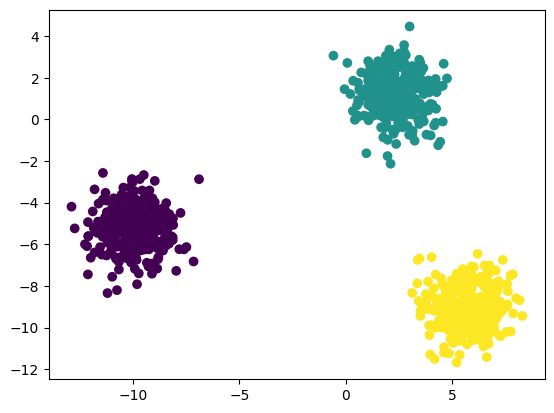

In [7]:
plt.scatter(X[:,0],X[:,1],c=y)

In [8]:
## Standardization using
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [9]:
from sklearn.model_selection import train_test_split
X_train,X_test=train_test_split(X,test_size=0.33,random_state=42)


In [10]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [11]:
## Elbow method using to select the ideal K value
wcss = []
for k in range(1,11):
    kmeans=KMeans(n_clusters=k,init='k-means++')#telling number of clusters and the initialization method
    kmeans.fit(X_train_scaled)
    wcss.append(kmeans.inertia_)#the wcss value is stored in .inertia_

In [12]:
wcss
#we can see that the wcss value is decreasing with increase in the value of k

[1339.9999999999995,
 656.3401696723938,
 48.78960477623807,
 40.29880700682246,
 32.699780119713985,
 26.277375170277768,
 24.415859817200236,
 21.495973765817233,
 19.63478031841116,
 18.161608288361865]

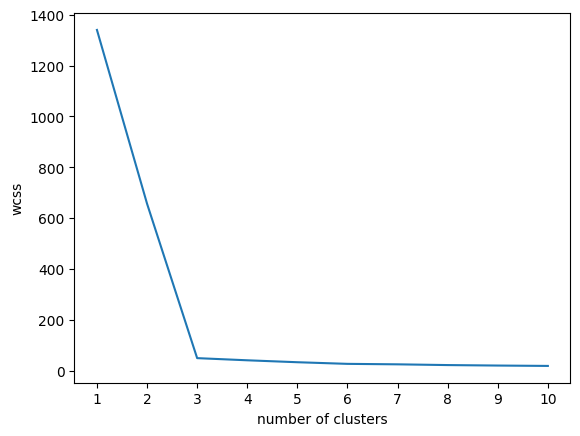

In [13]:
## plot elbow curve
plt.plot(range(1,11),wcss)
plt.xticks(range(1,11))
plt.xlabel('number of clusters')
plt.ylabel('wcss')
plt.show()
#shd see the region where sudden decrease and becomes stable here it is 3

In [14]:
#so now do using the selected clusters(here it is 3)
kmeans=KMeans(n_clusters=3,init='k-means++')
kmeans.fit_predict(X_train_scaled)#based on the center tell which cluster the point goes
#fit_predict is first fit then predict just predict is based on the value predict
#fit-predict means intialize then do till get proper cluster centroids then do predict for the test data

array([2, 2, 1, 0, 0, 2, 2, 2, 1, 2, 2, 0, 0, 1, 2, 2, 2, 1, 1, 2, 2, 0,
       2, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 2, 0, 0, 2, 1, 0, 0, 2, 1, 1, 0,
       0, 0, 0, 2, 0, 2, 0, 1, 1, 0, 0, 2, 0, 0, 2, 2, 2, 1, 1, 2, 2, 2,
       2, 2, 2, 0, 0, 1, 1, 2, 2, 0, 1, 1, 1, 1, 1, 0, 2, 2, 0, 2, 0, 0,
       1, 2, 1, 1, 1, 2, 1, 0, 0, 0, 1, 2, 1, 2, 2, 2, 2, 0, 2, 0, 1, 1,
       1, 1, 2, 2, 2, 0, 0, 0, 0, 1, 2, 1, 2, 1, 1, 0, 0, 2, 0, 0, 1, 1,
       1, 1, 2, 2, 2, 1, 1, 1, 1, 1, 0, 0, 0, 2, 0, 1, 1, 0, 0, 0, 2, 1,
       0, 2, 2, 0, 1, 0, 1, 2, 0, 2, 1, 1, 0, 2, 0, 2, 1, 2, 1, 1, 1, 2,
       1, 1, 0, 2, 1, 0, 1, 0, 2, 2, 0, 0, 0, 1, 0, 2, 0, 2, 1, 0, 0, 0,
       2, 2, 1, 2, 2, 1, 1, 1, 1, 1, 2, 1, 2, 2, 1, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 2, 0, 1, 1, 1, 0, 2, 0, 1, 1, 0, 0, 2, 0, 0, 0, 1, 2, 1, 0,
       0, 1, 2, 2, 0, 1, 1, 2, 1, 0, 0, 1, 0, 0, 2, 2, 1, 2, 1, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 2, 2, 0, 2, 1, 0, 0, 1, 1, 0, 1, 1, 2, 1, 2, 0,
       1, 1, 1, 1, 0, 2, 2, 0, 0, 0, 2, 0, 1, 2, 1,

In [15]:
y_pred=kmeans.predict(X_test_scaled)#only predict used because to use the final value of the clusters we use and do
y_pred

array([2, 0, 0, 0, 2, 2, 2, 2, 0, 2, 0, 0, 1, 0, 2, 2, 1, 1, 2, 2, 2, 2,
       0, 1, 2, 2, 1, 1, 1, 1, 2, 0, 1, 1, 1, 2, 1, 2, 2, 0, 2, 0, 2, 1,
       2, 2, 1, 0, 2, 1, 0, 2, 0, 1, 1, 2, 2, 0, 0, 2, 2, 0, 2, 1, 2, 1,
       0, 0, 2, 0, 1, 0, 1, 1, 1, 0, 0, 2, 2, 2, 1, 0, 1, 1, 1, 1, 0, 1,
       2, 1, 0, 1, 0, 2, 1, 2, 2, 2, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 0,
       1, 1, 2, 1, 1, 2, 0, 1, 0, 0, 0, 0, 1, 0, 2, 0, 2, 1, 2, 2, 2, 1,
       1, 1, 0, 2, 1, 0, 1, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 0, 2, 2, 0, 2,
       1, 0, 2, 0, 0, 0, 0, 1, 1, 2, 2, 0, 2, 0, 0, 1, 2, 0, 2, 1, 0, 2,
       0, 0, 1, 0, 2, 2, 0, 2, 0, 1, 1, 1, 1, 0, 2, 1, 2, 0, 2, 2, 2, 1,
       0, 0, 0, 1, 1, 1, 2, 2, 1, 0, 2, 2, 0, 1, 2, 2, 0, 0, 2, 0, 2, 0,
       1, 0, 1, 1, 1, 2, 2, 1, 1, 1, 2, 0, 1, 0, 1, 0, 0, 0, 1, 2, 0, 0,
       2, 1, 1, 2, 1, 1, 0, 2, 2, 2, 1, 0, 1, 0, 0, 1, 0, 2, 1, 0, 2, 0,
       1, 2, 2, 1, 0, 1, 2, 2, 0, 2, 1, 2, 2, 0, 1, 1, 1, 0, 0, 2, 1, 2,
       2, 1, 0, 2, 2, 0, 1, 2, 0, 1, 2, 0, 0, 2, 0,

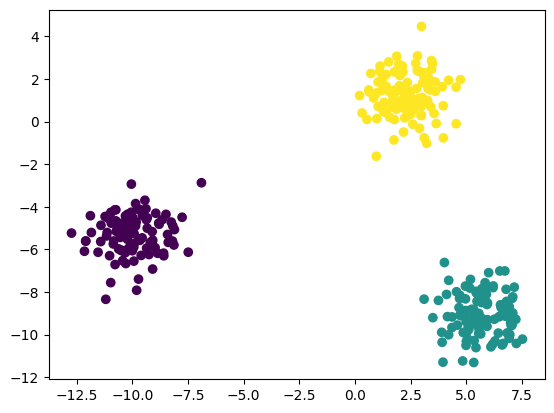

In [16]:
plt.scatter(X_test[:,0],X_test[:,1],c=y_pred)

# Validating the achieved K Value
use two
kneelocator
sillhoutee scoring

In [18]:
#for kneelocator using kneed
from kneed import KneeLocator

In [19]:
kl=KneeLocator(range(1,11),wcss,curve='convex',direction="decreasing")

In [20]:
kl.knee#gives the knee value

np.int64(3)

In [22]:
kl.elbow#gets the elbow

np.int64(3)

In [23]:
#using sillhoutee
from sklearn.metrics import silhouette_score
#to get the silhouette score
silhouette_coefficients=[]
for k in range(2,11):
    kmeans=KMeans(n_clusters=k,init="k-means++")
    kmeans.fit(X_train_scaled)
    score=silhouette_score(X_train_scaled,kmeans.labels_)
    silhouette_coefficients.append(score)

In [24]:
silhouette_coefficients

[np.float64(0.5872016416839619),
 np.float64(0.8551544987633919),
 np.float64(0.6810881980990889),
 np.float64(0.5523782418943363),
 np.float64(0.501966362360192),
 np.float64(0.3839399954821485),
 np.float64(0.35527289152245506),
 np.float64(0.33686418455392597),
 np.float64(0.3378438377413722)]

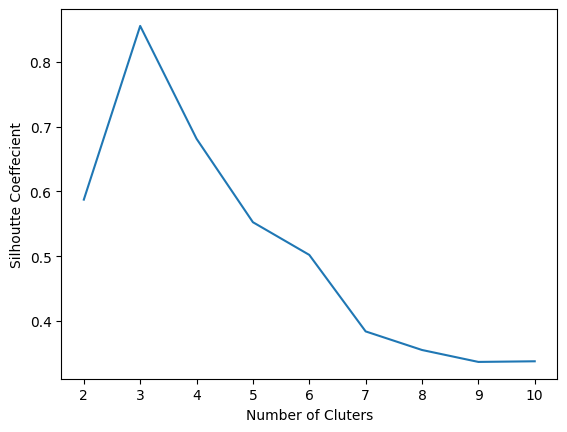

In [25]:
## plotting silhouette score
plt.plot(range(2,11),silhouette_coefficients)
plt.xticks(range(2,11))
plt.xlabel("Number of Cluters")
plt.ylabel("Silhoutte Coeffecient")
plt.show()
#at 3 the score is high then decreasing so we do from when highest then decrease that as our k value